In [25]:
import numpy as np 
import pandas as pd

In [26]:
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [27]:
from sklearn.preprocessing import OrdinalEncoder
ord = OrdinalEncoder()

data['Gender']=ord.fit_transform(data[['Gender']])
data = data.drop(columns=['CustomerID'] , axis=1 )

data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,19,15,39
1,1.0,21,15,81
2,0.0,20,16,6
3,0.0,23,16,77
4,0.0,31,17,40


In [28]:
x_train = data


In [29]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)

print(x_train)


[[ 1.12815215 -1.42456879 -1.73899919 -0.43480148]
 [ 1.12815215 -1.28103541 -1.73899919  1.19570407]
 [-0.88640526 -1.3528021  -1.70082976 -1.71591298]
 [-0.88640526 -1.13750203 -1.70082976  1.04041783]
 [-0.88640526 -0.56336851 -1.66266033 -0.39597992]
 [-0.88640526 -1.20926872 -1.66266033  1.00159627]
 [-0.88640526 -0.27630176 -1.62449091 -1.71591298]
 [-0.88640526 -1.13750203 -1.62449091  1.70038436]
 [ 1.12815215  1.80493225 -1.58632148 -1.83237767]
 [-0.88640526 -0.6351352  -1.58632148  0.84631002]
 [ 1.12815215  2.02023231 -1.58632148 -1.4053405 ]
 [-0.88640526 -0.27630176 -1.58632148  1.89449216]
 [-0.88640526  1.37433211 -1.54815205 -1.36651894]
 [-0.88640526 -1.06573534 -1.54815205  1.04041783]
 [ 1.12815215 -0.13276838 -1.54815205 -1.44416206]
 [ 1.12815215 -1.20926872 -1.54815205  1.11806095]
 [-0.88640526 -0.27630176 -1.50998262 -0.59008772]
 [ 1.12815215 -1.3528021  -1.50998262  0.61338066]
 [ 1.12815215  0.94373197 -1.43364376 -0.82301709]
 [-0.88640526 -0.27630176 -1.43

In [30]:
print(x_train.shape)
from sklearn.decomposition import PCA
pca =PCA(n_components=2)

train_data = pca.fit_transform(x_train)

print(train_data.shape)


(200, 4)
(200, 2)


[]

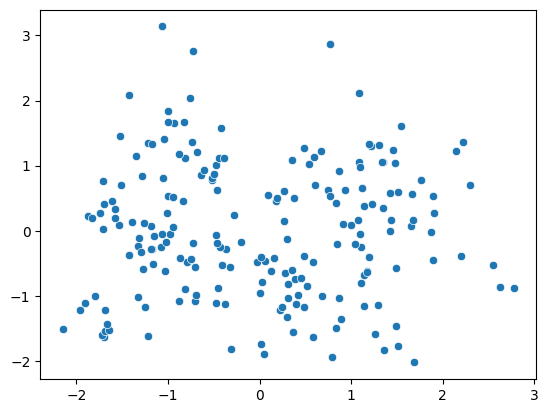

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns 

ax = sns.scatterplot(x=train_data[:,0], y=train_data[:,1] )
plt.plot()

In [32]:
from sklearn.cluster import KMeans
from kneed import KneeLocator
wcss = []
for i in range(1,20):
    kmean= KMeans(n_clusters=i , init= 'k-means++' )
    kmean.fit(x_train)
    wcss.append(kmean.inertia_)

kl = KneeLocator(range(1,20), wcss , curve= 'convex' , direction= 'decreasing' )

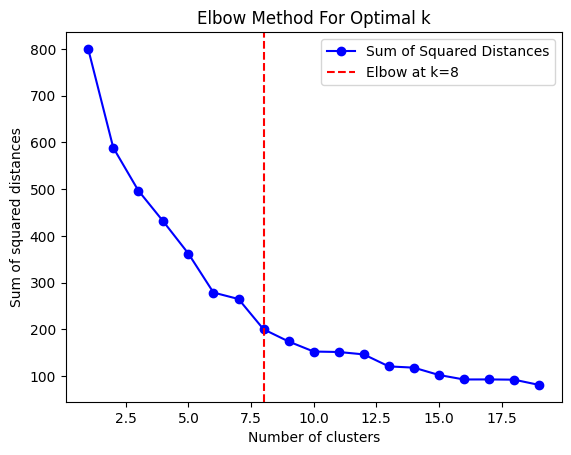

In [33]:
plt.plot(range(1, 20), wcss, 'bo-', label='Sum of Squared Distances')
plt.axvline(x=kl.elbow, linestyle='--', color='r', label='Elbow at k={}'.format(kl.elbow))
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.legend()
plt.show()

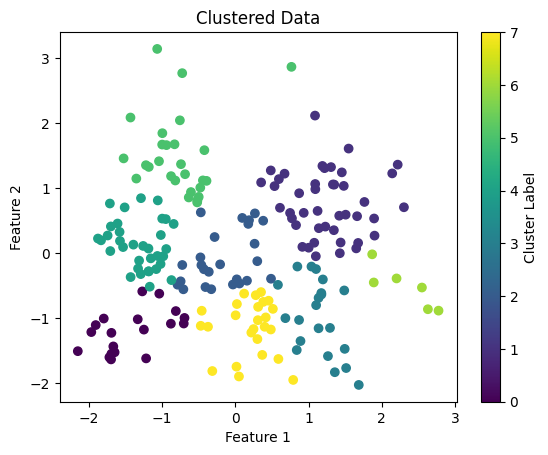

In [40]:
k = kl.elbow 

kmean = KMeans(n_clusters= k , init = 'k-means++')
kmean.fit(train_data)

scatter = plt.scatter(train_data[:, 0], train_data[:, 1] , c=kmean.labels_ )
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clustered Data')
plt.colorbar(scatter, label='Cluster Label')
plt.show()



In [49]:
from sklearn.metrics import silhouette_score
score = silhouette_score(train_data , kmean.labels_)
print(score)

0.3798621808225889
